# Final Project Report

* Class: DS 5100
* Student Name: Nicolas Edier
* Student Net ID: nnu7hu
* This URL: https://github.com/NicolasEdier/DS5100-Final-Project-Package/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/NicolasEdier/DS5100-Final-Project-Package

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

import numpy as np

import pandas as pd

from itertools import permutations, combinations

from collections import Counter


class Die:

    """
    A class to simulate a die with customizable faces and weights.

    Attributes:
        _faces (numpy array): The faces of the die.
        _weights (pandas DataFrame): A private data frame storing faces and their weights.
    """

    def __init__(self, faces):
        """
        Initialize the die with given faces.

        Args:
            faces (numpy array): A NumPy array of distinct face values (strings or numbers).

        Raises:
            TypeError: If `faces` is not a NumPy array.
            ValueError: If `faces` contains duplicate values.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        if len(faces) != len(set(faces)):
            raise ValueError("Faces must be distinct.")
        self._weights = pd.DataFrame({'face': faces, 'weight': 1.0}).set_index('face')

    def change_weight(self, face, weight):
        """
        Change the weight of a specific face.

        Args:
            face: The face value whose weight is to be changed.
            weight (float): The new weight to assign to the face.

        Raises:
            IndexError: If the face is not a valid die face.
            TypeError: If weight is not numeric.
        """
        if face not in self._weights.index:
            raise IndexError("Face not found in die.")
        try:
            weight = float(weight)
        except ValueError:
            raise TypeError("Weight must be numeric.")
        self._weights.at[face, 'weight'] = weight

    def roll(self, times=1):
        """
        Roll the die one or more times.

        Args:
            times (int): The number of times to roll the die. Defaults to 1.

        Returns:
            list: A list of rolled face values.
        """
        return list(self._weights.sample(n=times, weights='weight', replace=True).index)

    def show(self):
        """
        Show the current state of the die.

        Returns:
            pandas DataFrame: A copy of the data frame with faces and weights.
        """
        return self._weights.copy()
       

class Game:

    """
    A class to simulate a game involving one or more similar dice.

    Attributes:
        _dice (list): A list of Die objects.
        _results (pandas DataFrame): A private data frame storing the results of the most recent play.
    """

    def __init__(self, dice):
        """
        Initialize the game with a list of dice.

        Args:
            dice (list): A list of Die objects.
        """
        self._dice = dice
        self._results = pd.DataFrame()

    def play(self, rolls):
        """
        Play the game by rolling all dice a specified number of times.

        Args:
            rolls (int): The number of times to roll the dice.
        """
        results = {f"Die_{i}": die.roll(rolls) for i, die in enumerate(self._dice)}
        self._results = pd.DataFrame(results)

    def show(self, form="wide"):
        """
        Show the results of the most recent play.

        Args:
            form (str): The format of the results ('wide' or 'narrow'). Defaults to 'wide'.

        Returns:
            pandas DataFrame: The results in the specified format.

        Raises:
            ValueError: If the form is not 'wide' or 'narrow'.
        """
        if form == "wide":
            return self._results.copy()
        elif form == "narrow":
            return self._results.stack().to_frame("face").reset_index(names=["roll", "die"])
        else:
            raise ValueError("Form must be 'wide' or 'narrow'.")


class Analyzer:

    """
    A class to analyze the results of a game.

    Attributes:
        _game (Game): The game object to analyze.
        _results (pandas DataFrame): The results of the most recent game play.
    """

    def __init__(self, game):
        """
        Initialize the analyzer with a game object.

        Args:
            game (Game): The game object.

        Raises:
            ValueError: If the input is not a Game object.
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        self._game = game
        self._results = game.show()

    def jackpot(self):
        """
        Compute the number of jackpots (all faces the same) in the game results.

        Returns:
            int: The number of jackpots.
        """
        return int(self._results.apply(lambda row: len(set(row)) == 1, axis=1).sum())

    def face_counts_per_roll(self):
        """
        Compute the face counts for each roll.

        Returns:
            pandas DataFrame: A data frame with face counts for each roll.
        """
        return self._results.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)

    def combo_counts(self):
        """
        Compute the counts of distinct combinations of faces rolled.

        Returns:
            pandas DataFrame: A data frame of combinations and their counts.
        """
        combos = self._results.apply(lambda row: tuple(sorted(row)), axis=1)
        return pd.DataFrame.from_dict(Counter(combos), orient='index', columns=['count'])

    def permutation_counts(self):
        """
        Compute the counts of distinct permutations of faces rolled.

        Returns:
            pandas DataFrame: A data frame of permutations and their counts.
        """
        perms = self._results.apply(lambda row: tuple(row), axis=1)
        return pd.DataFrame.from_dict(Counter(perms), orient='index', columns=['count'])

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

import unittest

import numpy as np

import pandas as pd

from Final.Final import Die, Game, Analyzer


class TestDie(unittest.TestCase):

    def test_die_initializer_valid(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        self.assertEqual(list(die.show().index), [1, 2, 3, 4, 5, 6])
        self.assertTrue((die.show()['weight'] == 1.0).all())
    
    def setUp(self):
        self.die = Die(np.array(['A', 'B', 'C']))

    def test_change_weight(self):
        self.die.change_weight('A', 2.0)
        self.assertEqual(self.die.show().at['A', 'weight'], 2.0)

    def test_roll(self):
        result = self.die.roll(5)
        self.assertEqual(len(result), 5)

    def test_show(self):
        self.assertEqual(len(self.die.show()), 3)


class TestGame(unittest.TestCase):

    def test_game_initializer_valid(self):
        dice = [Die(np.array([1, 2, 3])), Die(np.array(['a', 'b', 'c']))]
        game = Game(dice)
        self.assertEqual(len(game._dice), 2)
        self.assertIsInstance(game._dice[0], Die)
        self.assertIsInstance(game._dice[1], Die)
        
    def setUp(self):
        self.dice = [Die(np.array(['A', 'B', 'C'])) for _ in range(3)]
        self.game = Game(self.dice)

    def test_play(self):
        self.game.play(5)
        self.assertEqual(self.game.show().shape[0], 5)

    def test_show(self):
        self.game.play(5)
        self.assertEqual(self.game.show("wide").shape[0], 5)


class TestAnalyzer(unittest.TestCase):

    def test_analyzer_initializer_valid(self):
        dice = [Die(np.array([1, 2, 3])), Die(np.array(['a', 'b', 'c']))]
        game = Game(dice)
        game.play(5)
        analyzer = Analyzer(game)
        self.assertTrue(isinstance(analyzer._results, pd.DataFrame))
        self.assertEqual(analyzer._results.shape[0], 5)
    
    def setUp(self):
        dice = [Die(np.array(['A', 'B', 'C'])) for _ in range(2)]
        game = Game(dice)
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_jackpot(self):
        self.assertIsInstance(self.analyzer.jackpot(), int)

    def test_face_counts_per_roll(self):
        result = self.analyzer.face_counts_per_roll()
        self.assertTrue(isinstance(result, pd.DataFrame))

    def test_combo_counts(self):
        result = self.analyzer.combo_counts()
        self.assertTrue(isinstance(result, pd.DataFrame))

    def test_permutation_counts(self):
        result = self.analyzer.permutation_counts()
        self.assertTrue(isinstance(result, pd.DataFrame))


if __name__ == "__main__":

    with open("test_results.txt", "w") as f:
        runner = unittest.TextTestRunner(stream=f, verbosity=2)
        unittest.main(testRunner=runner, exit=False)

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

test_analyzer_initializer_valid (__main__.TestAnalyzer) ... ok

test_combo_counts (__main__.TestAnalyzer) ... ok

test_face_counts_per_roll (__main__.TestAnalyzer) ... ok

test_jackpot (__main__.TestAnalyzer) ... ok

test_permutation_counts (__main__.TestAnalyzer) ... ok

test_change_weight (__main__.TestDie) ... ok

test_die_initializer_valid (__main__.TestDie) ... ok

test_roll (__main__.TestDie) ... ok

test_show (__main__.TestDie) ... ok

test_game_initializer_valid (__main__.TestGame) ... ok

test_play (__main__.TestGame) ... ok

test_show (__main__.TestGame) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.065s

OK

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [14]:
from Final.Final import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [15]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module Final.Final:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  A class to simulate a die with customizable faces and weights.
 |  
 |  Attributes:
 |      _faces (numpy array): The faces of the die.
 |      _weights (pandas DataFrame): A private data frame storing faces and their weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initialize the die with given faces.
 |      
 |      Args:
 |          faces (numpy array): A NumPy array of distinct face values (strings or numbers).
 |      
 |      Raises:
 |          TypeError: If `faces` is not a NumPy array.
 |          ValueError: If `faces` contains duplicate values.
 |  
 |  change_weight(self, face, weight)
 |      Change the weight of a specific face.
 |      
 |      Args:
 |          face: The face value whose weight is to be changed.
 |          weight (float): The new weight to assign to the face.
 |      
 |      Raises:
 |          IndexError: If the face is not a va

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/NicolasEdier/DS5100-Final-Project-Package/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

-bash-4.4$pip install .

Defaulting to user installation because normal site-packages is not writeable

Processing /sfs/gpfs/tardis/home/nnu7hu/Documents/MSDS/DS5100/DS5100-nnu7hu/lessons/Final-Project/DS5100-Final-Project-Package

      Preparing metadata (setup.py) ... done
  
Using legacy 'setup.py install' for Final, since package 'wheel' is not installed.

Installing collected packages: Final

  Attempting uninstall: Final
  
    Found existing installation: Final 0.1
    
    Uninstalling Final-0.1:
    
      Successfully uninstalled Final-0.1
      
    Running setup.py install for Final ... done
    
Successfully installed Final-0.1

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import permutations, combinations
from collections import Counter

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [34]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [35]:
game1 = Game([fair_coin, fair_coin])
game1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [36]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [37]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

jackpot1 = analyzer1.jackpot()
jackpot2 = analyzer2.jackpot()

print(jackpot1)
print(jackpot2)

494
382


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [38]:
relative_frequency1 = jackpot1 / 1000
relative_frequency2 = jackpot2 / 1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

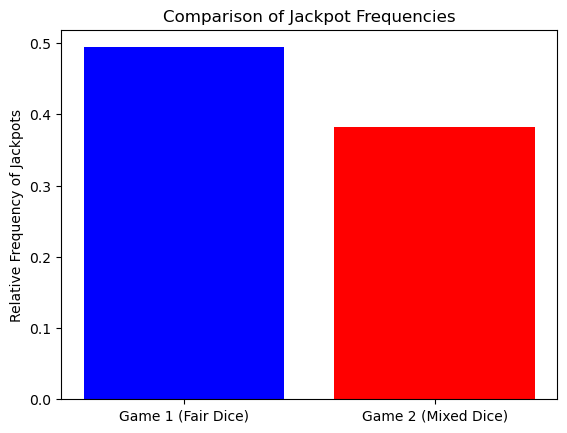

In [39]:
plt.bar(['Game 1 (Fair Dice)', 'Game 2 (Mixed Dice)'], 
        [relative_frequency1, relative_frequency2], color=['blue', 'red'])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [40]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [41]:
die2.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [42]:
die3.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [43]:
game3 = Game([die1, die1, die1, die1, die1])
game3.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [44]:
game4 = Game([die2, die3, die1, die1, die1])
game4.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

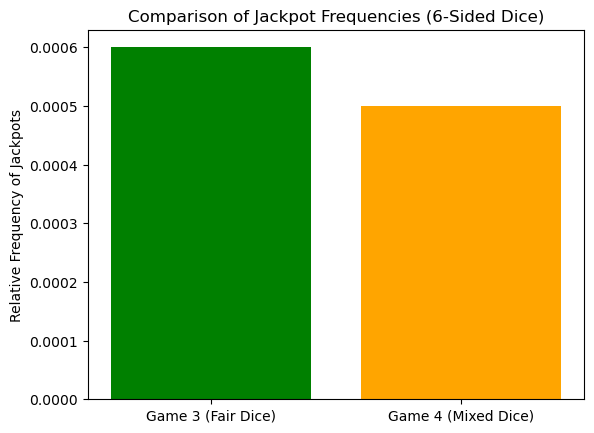

In [45]:
analyzer3 = Analyzer(game3)
analyzer4 = Analyzer(game4)

relative_frequency3 = analyzer3.jackpot() / 10000
relative_frequency4 = analyzer4.jackpot() / 10000

plt.bar(['Game 3 (Fair Dice)', 'Game 4 (Mixed Dice)'], 
        [relative_frequency3, relative_frequency4], color=['green', 'orange'])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies (6-Sided Dice)')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [50]:
letter_frequencies = pd.read_csv('english_letters.txt', delim_whitespace=True, header=None, names=['Letter', 'Frequency'])
alphabet_die = Die(letter_frequencies['Letter'].to_numpy())

for _, row in letter_frequencies.iterrows():
    alphabet_die.change_weight(row['Letter'], row['Frequency'])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [51]:
game5 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game5.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [52]:
perms = Analyzer(game5).permutation_counts()
scrabble_words = set(pd.read_csv('scrabble_words.txt', header=None)[0].to_list())
valid_words_count = sum(1 for p in perms.index if ''.join(p) in scrabble_words)

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

Words with 4 dice: 60
Words with 5 dice: 10


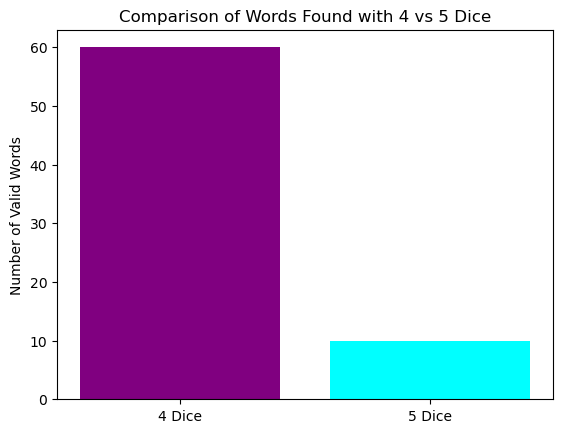

In [53]:
game6 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
game6.play(1000)
perms5 = Analyzer(game6).permutation_counts()
valid_words_count_5 = sum(1 for p in perms5.index if ''.join(p) in scrabble_words)

# Compare results
print(f"Words with 4 dice: {valid_words_count}")
print(f"Words with 5 dice: {valid_words_count_5}")

# Plot comparison
plt.bar(['4 Dice', '5 Dice'], [valid_words_count, valid_words_count_5], color=['purple', 'cyan'])
plt.ylabel('Number of Valid Words')
plt.title('Comparison of Words Found with 4 vs 5 Dice')
plt.show()